In [285]:
import numpy as np
import pandas as pd
import os
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [286]:
pd.set_option('display.max_columns', None)

In [287]:
df = pd.read_excel(r'C:\Users\Rohit Varre\Desktop\MliS\ML lab\Assignment 2\trainDataset.xls')

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


In [289]:
df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             400 non-null    object 
 1   pCR (outcome)                  400 non-null    int64  
 2   RelapseFreeSurvival (outcome)  400 non-null    float64
 3   Age                            400 non-null    float64
 4   ER                             400 non-null    int64  
 5   PgR                            400 non-null    int64  
 6   HER2                           400 non-null    int64  
 7   TrippleNegative                400 non-null    int64  
 8   ChemoGrade                     400 non-null    int64  
 9   Proliferation                  400 non-null    int64  
 10  HistologyType                  400 non-null    int64  
 11  LNStatus                       400 non-null    int64  
 12  TumourStage                    400 non-null    int

In [290]:
df.drop(['pCR (outcome)'],axis = 1, inplace = True)

In [291]:
df.head()

,ID,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.3

In [292]:
null = []
for i in df.columns:
    if 999 in df[i].unique():
        check = df[i].value_counts()[999]
        print(i,check)
        null.append(i)

PgR 1
HER2 1
TrippleNegative 1
ChemoGrade 3
Proliferation 2
HistologyType 3
LNStatus 1


In [293]:
for i in null:
    df[i].replace(999,df[i].mode()[0],inplace = True)
df.describe()

,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000,40

In [294]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

In [295]:
X_img = X.iloc[:,11:]
X_img.head()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.407895,0.184265,0.685680,0.149585,0.907867,0.907867,0.963147,0.938578,-0.149786,0.425720,0.184265,1.806982,0.538903,1.309203,0.407895,0.714849,3.613964,1.

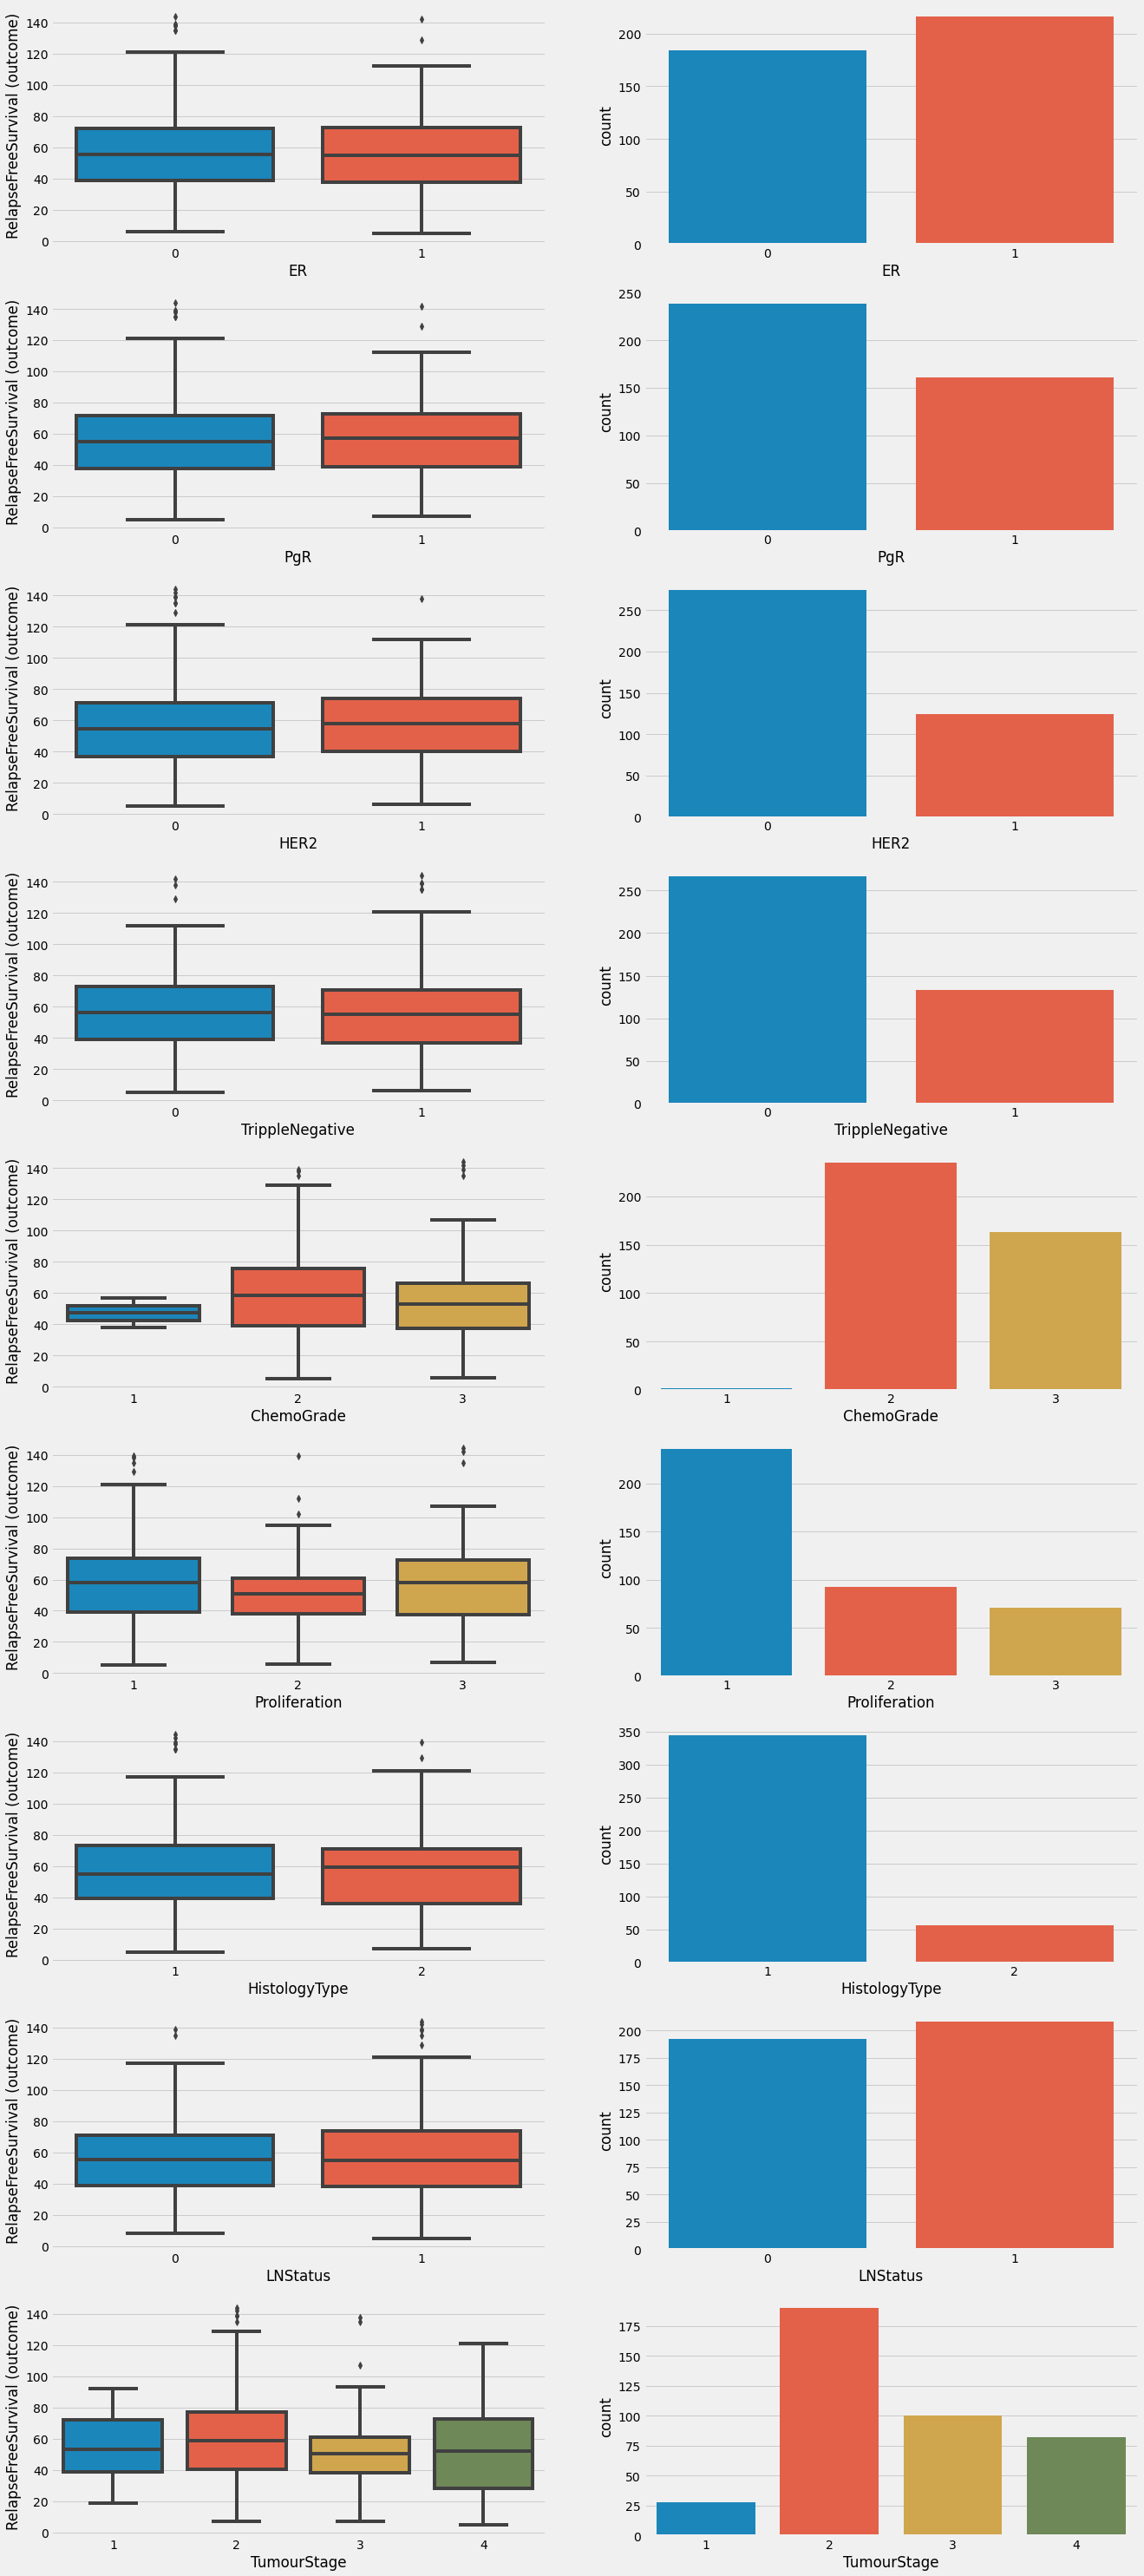

In [335]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
for i, col in enumerate(df.columns[3:12]):
    sns.boxplot(y='RelapseFreeSurvival (outcome)', x=col, data = df, ax=axes[i][0])
    sns.countplot(x=col, data = df, ax=axes[i][1])

In [297]:
# fig, ax = plt.subplots(nrows=20, ncols=6, figsize=(300,560))
# fig.subplots_adjust(hspace =.2, wspace=.2)
# ax = ax.ravel()
# for i, col in enumerate(X.columns[1:]):
#     ax[i].plot(X[col],y,'or',markersize = 15)

In [298]:
corrMat_kendall = df.iloc[:,1:].corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,HER2,0.067384
4,original_ngtdm_Coarseness,0.061385


In [299]:
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.05) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.05)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-299-43f24d347939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,HER2,0.067384
4,original_ngtdm_Coarseness,0.061385


In [300]:
corrMatt = df.iloc[:,1:].corr()
corrMat = pd.DataFrame(corrMatt)
corrMat.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr = corrMat['RelapseFreeSurvival (outcome)']
corr = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr.reset_index(inplace=True)
corr.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,HER2,0.067384
4,original_ngtdm_Coarseness,0.061385


In [301]:
corr_sig = corr[(corr['RelapseFreeSurvival (outcome)']>0.05) | (corr['RelapseFreeSurvival (outcome)']<-0.05)]
corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
corr_sig.head()

<ipython-input-301-30371137a452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,HER2,0.067384
4,original_ngtdm_Coarseness,0.061385


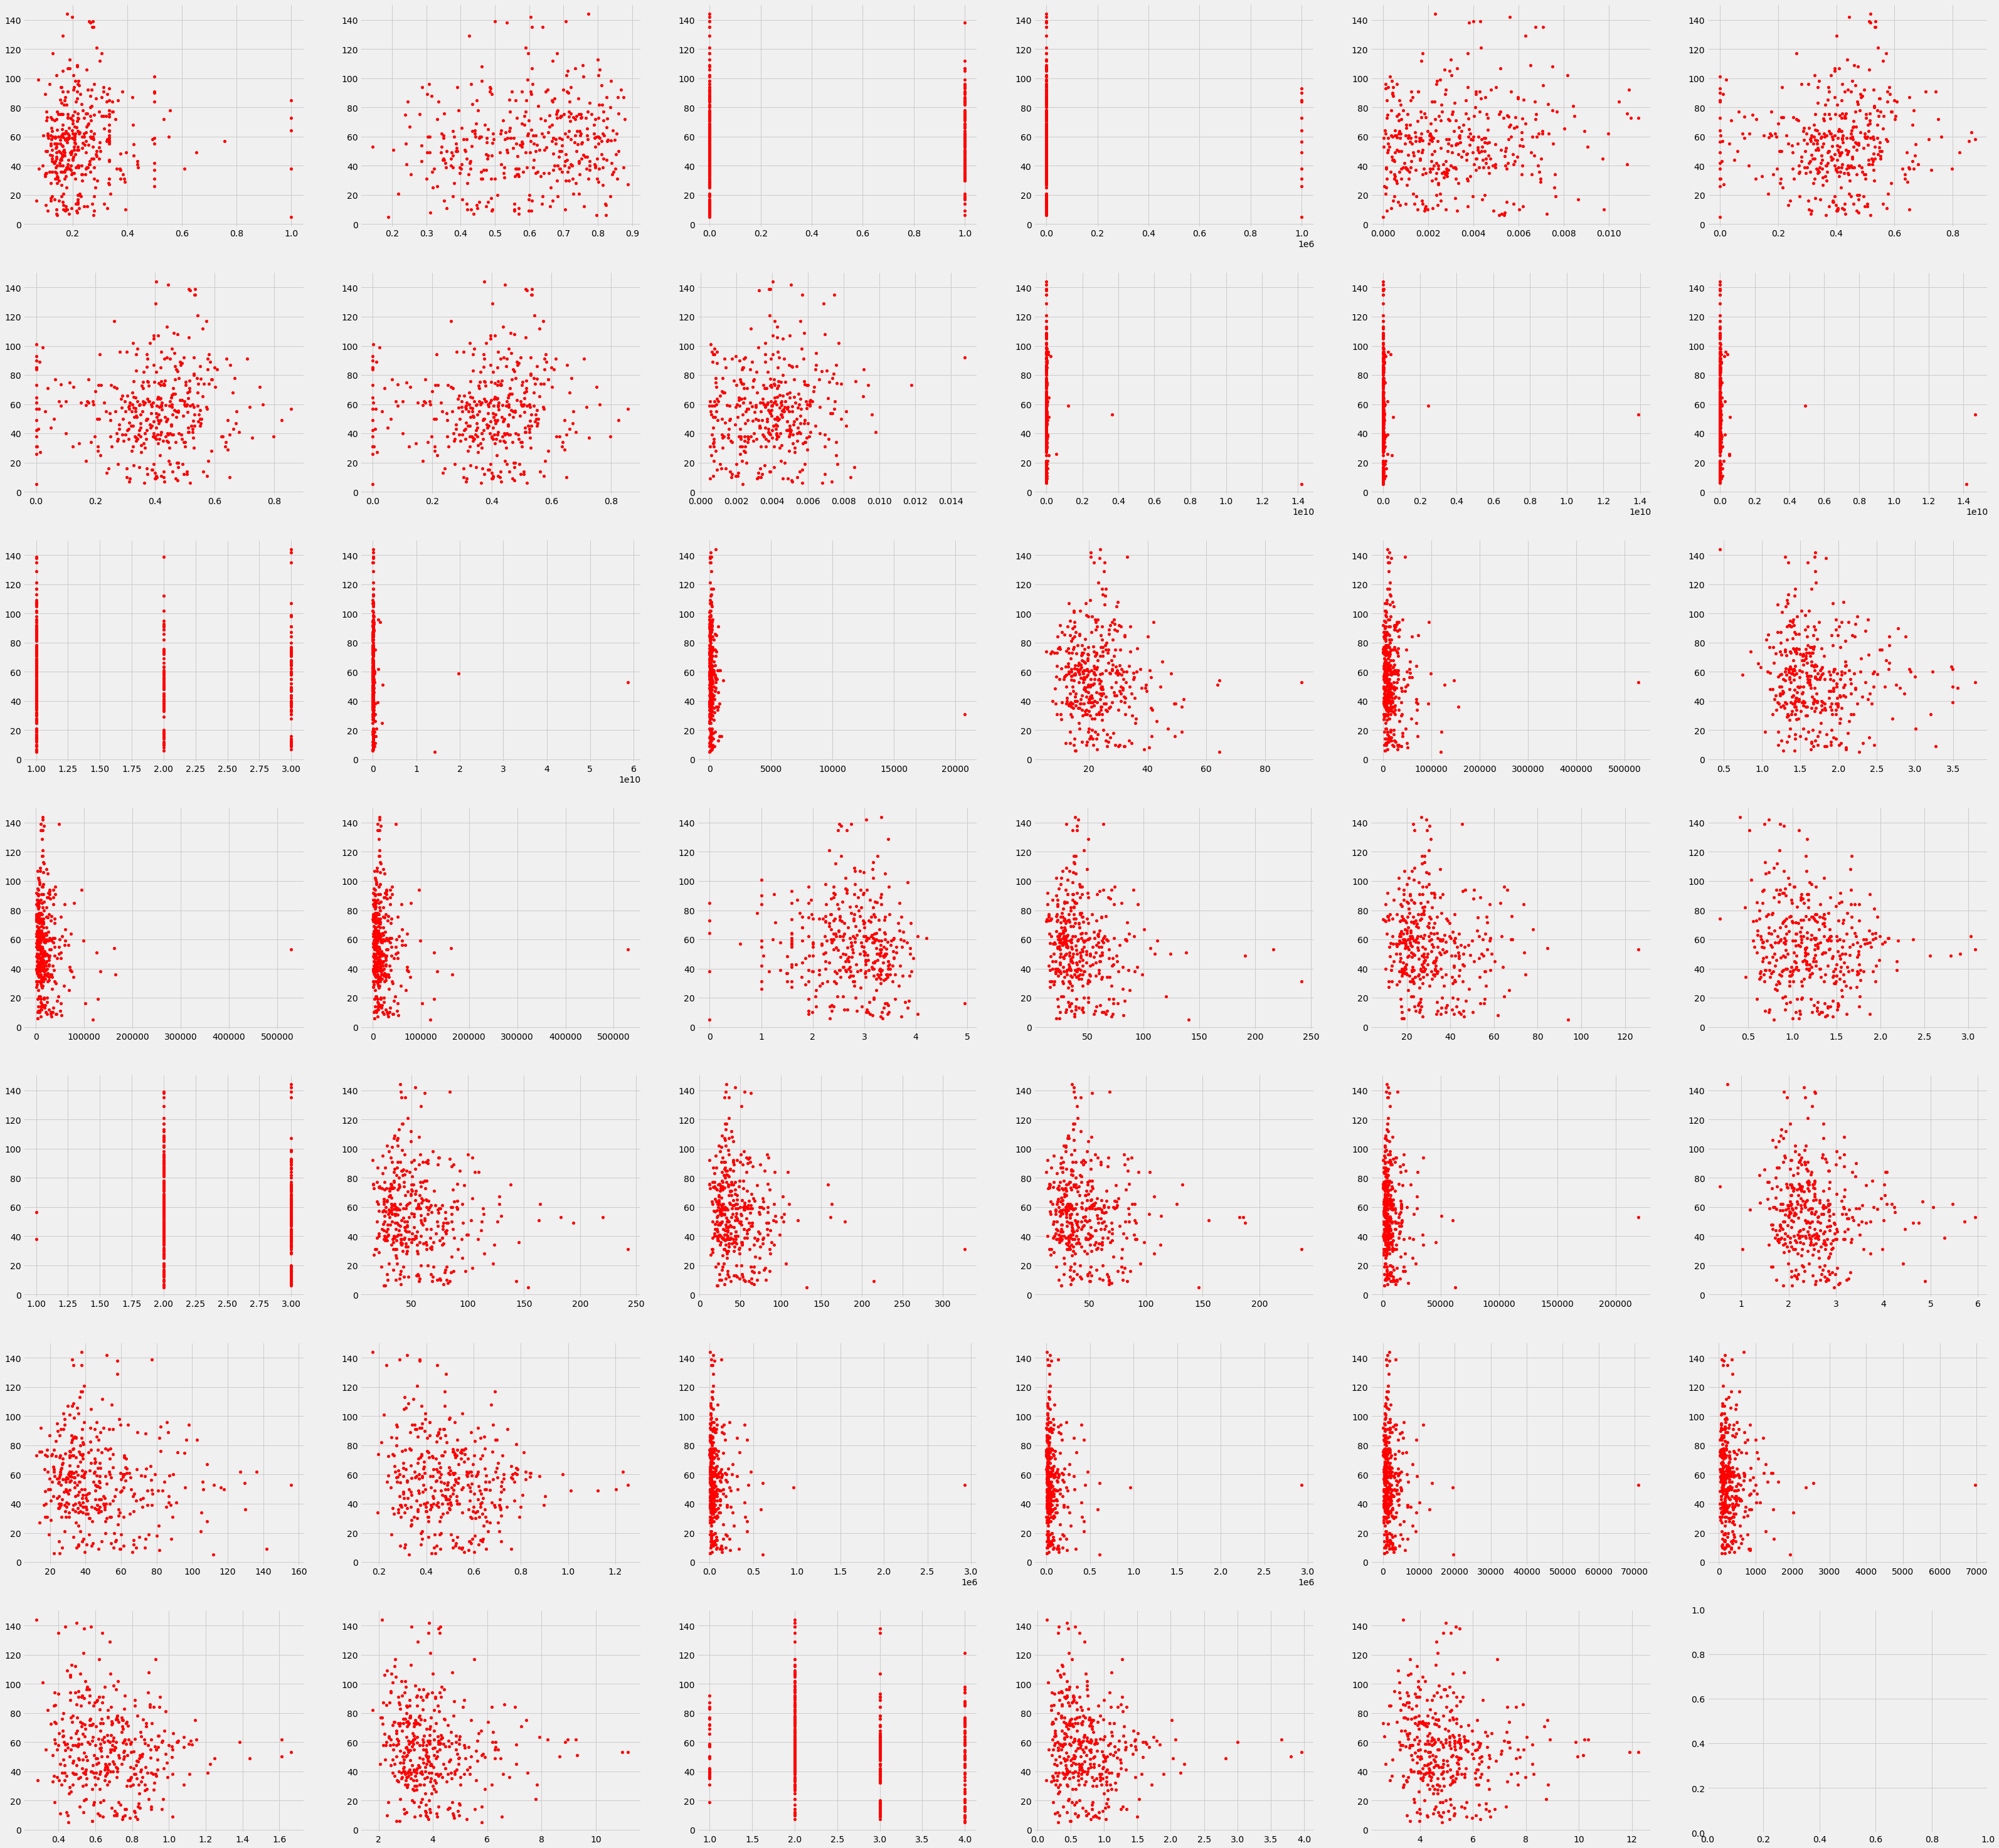

In [302]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//6, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

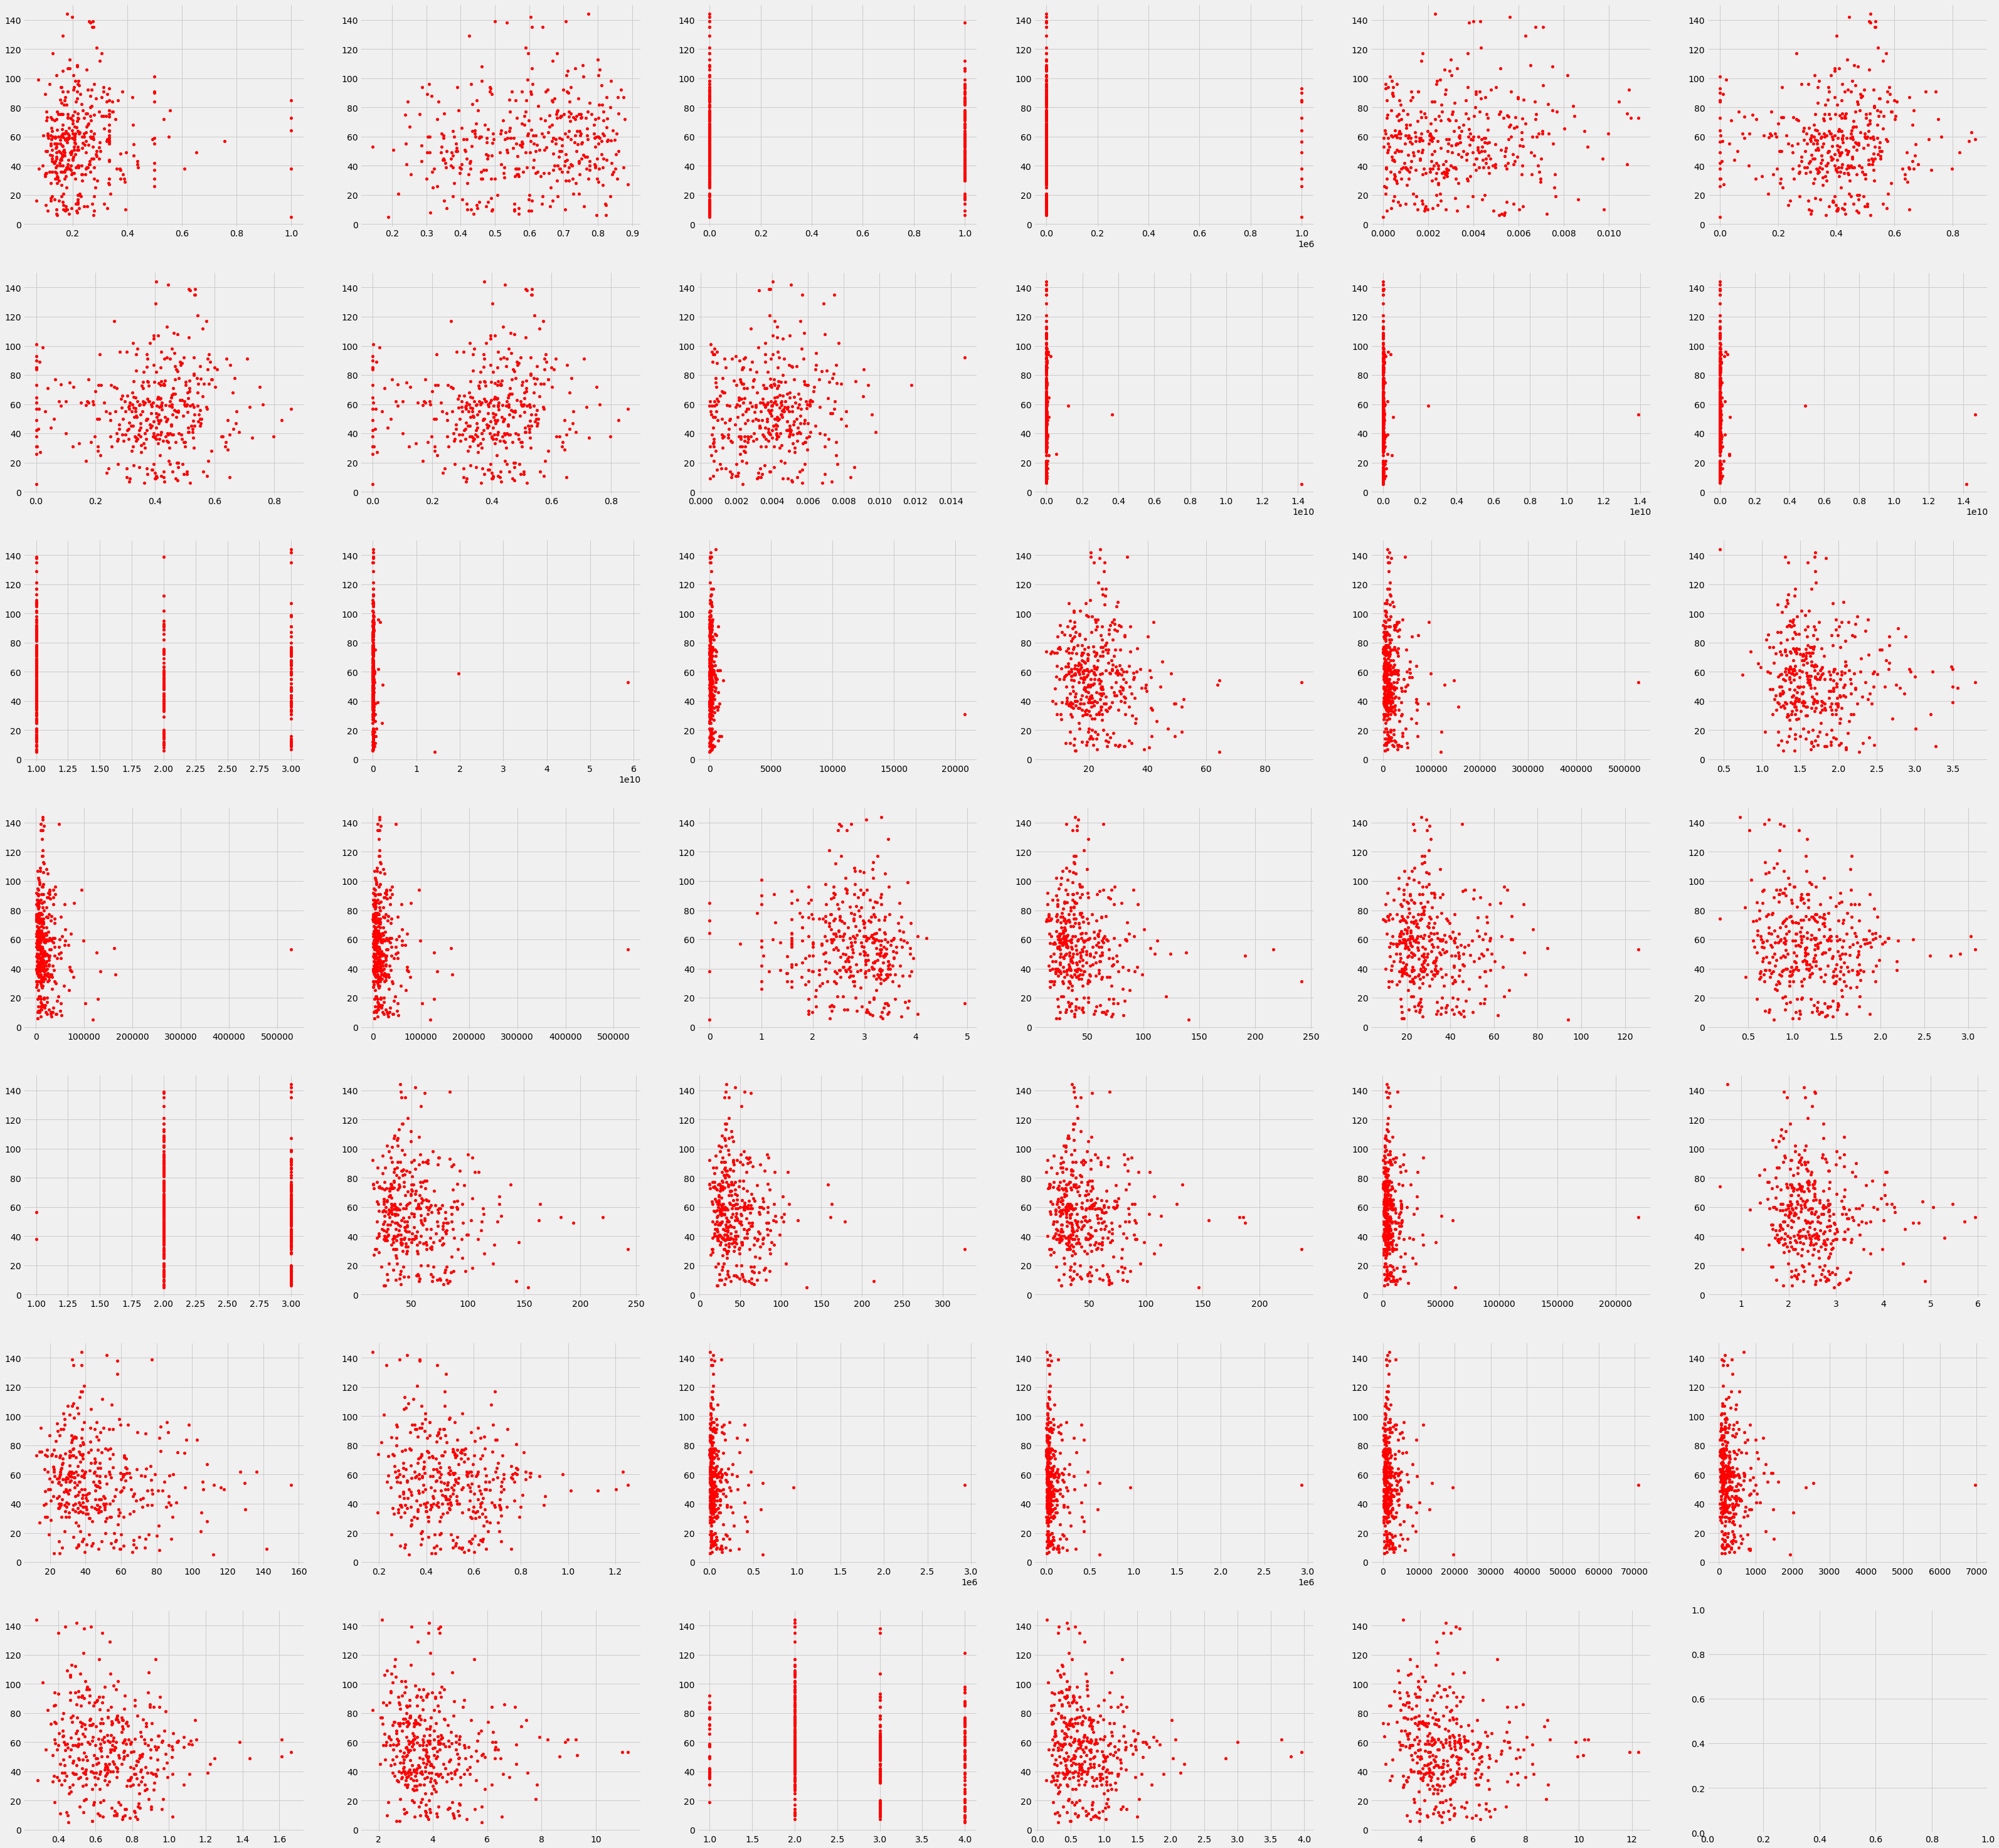

In [303]:
fig, ax = plt.subplots(nrows=len(corr_sig['index'])//6, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(corr_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

In [304]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

In [305]:
X_img = X.iloc[:,10:]
X_img.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.407895,0.184265,0.685680,0.149585,0.907867,0.907867,0.963147,0.938578,-0.149786,0.425720,0.184265,1.806982,0.538903,1.3

In [306]:
from sklearn.manifold import TSNE
X_img = TSNE(n_components=30,method='exact').fit_transform(X_img)
print(X.shape,y.shape)

C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 117) (400, 1)


In [307]:
X_img = pd.DataFrame(X_img)
X_img.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.079717,0.068358,0.073757,-0.112319,-0.168198,0.153493,0.113112,0.046767,-0.078876,0.091850,-0.020801,0.084342,-0.189732,0.079804,-0.032541,0.149915,-0.081125,0.174478,-0.023859,0.065619,-0.278406,0.129643,-0.153711,-0.067055,0.118247,-0.071871,0.129096,-0.119642,-0.084215,-0.073848
std,2.102392,2.367941,3.375733,2.295922,5.391901,3.059902,4.705661,2.365050,3.242656,3.176835,1.924471,3.154192,3.712665,9.523787,1.789721,3.039828,3.661391,5.265065,2.291291,2.800327,5.168496,2.764847,6.379009,3.196980,2.303142,2.406497,2.115671,2.281597,2.428963,4.978282
min,-9.485489,-17.487200,-42.618870,-26.112049,-55.003090,-17.375511,-9.330951,-13.868608,-36.568283,-26.361179,-13.194136,-14.626594,-58.435791,-84.159798,-8.217301,-9.667044,-48.777565,-48.948380,-16.247705,-17.181229,-82.390762,-7.282294,-90.899345,-25.810659,-10.007319,-19.778704,-7.422121,-26.023396,-29.502550,-63.025692
25%,-0.999191,-0.650639,-1.079125,-0.619217,-1.511375,-0.754373,-0.537443,-0.525449,-0.876786,-0.651325,-0.864690,-1.305706,-0.816870,-1.051846,-1.008046,-0.487294,-0.636340,-0.942706,-1.021836,-1.323312,-1.016133,-0.957481,-1.428947,-0.956950,-0.531279,-0.884608,-0.908005,-0.721629,-0.809613,-0.758967
50%,0.064660,0.051059,0.095269,0.008447,-0.109938,-0.046959,-0.006397,0.010488,-0.041919,0.068481,-0.049051,0.107452,0.080956,-0.087615,-0.038153,0.050244,-0.044752,0.008949,-0.042975,-0.059568,0.022450,-0.098845,0.052155,-0.053241,-0.018363,-0.172085,0.021764,0.039540,0.029944,0.060149
75%,0.926923,0.670212,0.980860,0.617656,1.519964,0.625816,0.493919,0.473615,0.713768,0.684202,0.789525,1.404666,0.900954,1.063168,0.766226,0.584283,0.473024,0.800352,1.006386,1.263402,1.021707,1.132197,1.219049,0.926592,0.640817,0.706257,1.010203,0.525890,0.736012,0.685272
max,17.991842,16.156397,24.147173,11.704811,56.419060,39.881981,86.821152,27.313580,37.370266,27.417912,9.807689,35.090508,14.233170,133.233963,8.150106,54.057709,34.653889,67.771118,16.759413,17.197794,34.045696,28.635674,74.502167,40.369305,30.941216,17.583946,13.849703,11.040798,14.274565,37.312920


In [308]:
X_img.insert(0,'RelapseFreeSurvival (outcome)',df['RelapseFreeSurvival (outcome)'])
X_img.head()

,RelapseFreeSurvival (outcome),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,144.0,1.240570,-0.505349,-2.008620,0.214095,0.604744,0.919712,-0.714723,0.256698,0.431289,1.324839,-2.713839,0.959131,0.369383,-1.337201,5.551309,0.364426,-0.842494,-1.058193,0.988166,0.813947,-4.100595,2.842873,-2.308531,0.698944,0.792591,-1.908222,-0.376852,1.070659,-0.579516,0.096496
1,142.0,-0.040516,-0.096725,-2.102369,-1.011871,-3.088910,2.372500,-0.078910,-0.020617,-0.189511,-0.521346,0.092374,-0.149603,-0.579908,0.658398,-0.356842,0.205634,-0.074350,0.240306,3.877353,2.781403,-1.806041,4.930923,-3.192092,0.488131,1.412154,-1.663702,-0.720305,0.042774,-1.761246,2.302974
2,135.0,-2.276549,-0.512536,1.482020,-1.480634,-2.806803,-0.636409,-3.064500,1.785900,-0.001106,-0.397842,-1.350570,-0.289041,0.033554,1.340821,-0.831881,-0.532823,-3.327760,0.562397,-1.078006,1.243237,-2.901814,0.511386,-1.538536,-1.307799,-0.112139,0.215518,-0.897991,-0.288209,-0.160346,-0.418633
3,12.0,0.736500,0.145762,0.561837,1.314055,1.976878,0.229352,-4.245367,-0.077146,2.132383,1.080736,-1.680999,1.534457,-0.274043,-1.103321,0.694691,0.252542,1.928926,-2.499631,0.398843,-1.683770,1.083563,-3.738346,0.084279,1.184654,-0.200392,-0.844576,1.009620,0.928335,-0.149704,-1.173588
4,109.0,-1.403621,2.638125,0.229404,-3.509999,-1.309500,0.251820,0.342383,-0.023700,-2.273325,-2.219995,0.483287,-0.227780,-0.091948,1.089462,-0.422369,-1.678314,-0.422712,0.045743,-0.171603,2.841826,-1.194113,-0.059694,-0.017666,-0.227087,-2.066489,0.295132,0.330925,-0.719923,-3.252853,0.337839


In [309]:
corrMat_kendall = X_img.corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,8,0.060234
2,24,0.057063
3,26,0.051852
4,4,0.050569


In [310]:
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.01) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.02)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-310-1e5146a37883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,8,0.060234
2,24,0.057063
3,26,0.051852
4,4,0.050569


In [311]:
len(kendall_sig)

21

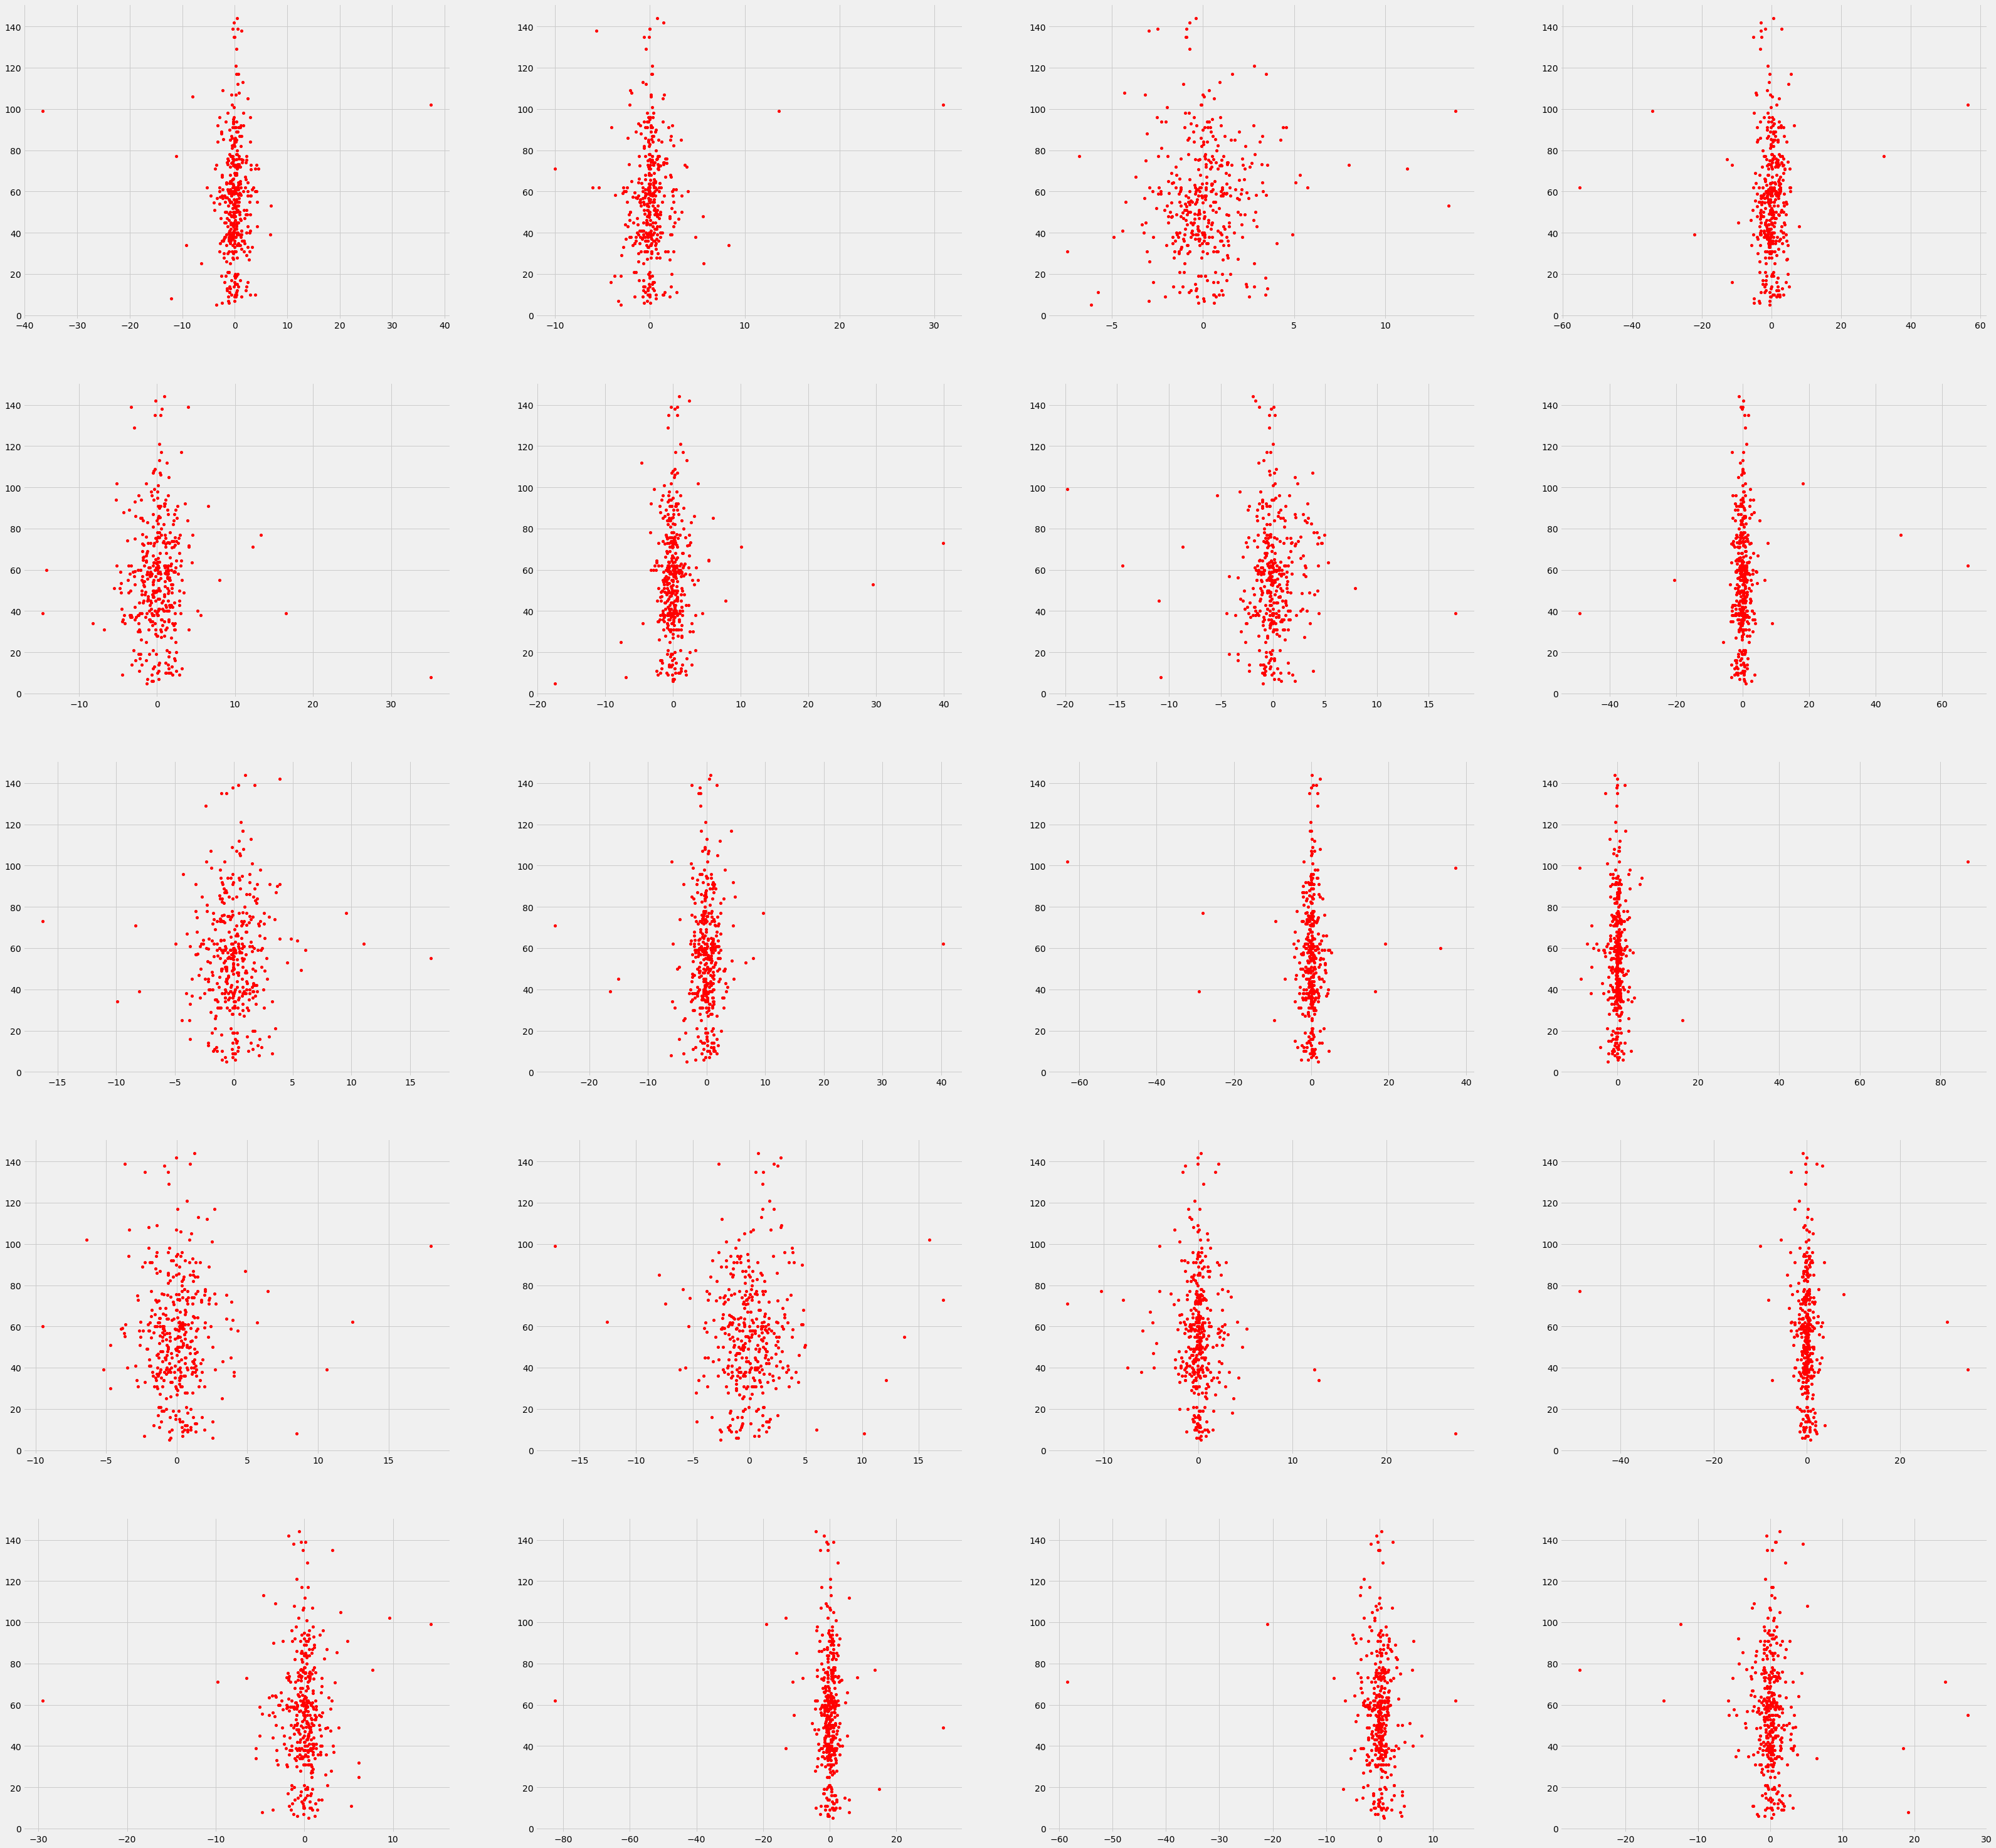

In [324]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//4, ncols=4, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X_img[col],X_img['RelapseFreeSurvival (outcome)'],'or',markersize = 4)

In [313]:
X.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

In [314]:
# X = np.array(X.iloc[:,1:])
# y = np.array(y)
# print(X.shape,y.shape)

In [315]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [316]:
print(x_train.shape,y_train.shape)

(320, 117) (320, 1)


In [343]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': [80, 90, 100],
    'min_samples_leaf': [10, 15, 20],
    'min_samples_split': [10, 15, 20],
    'n_estimators': [300, 400, 500, 600,]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 3072 candidates, totalling 9216 fits


KeyboardInterrupt: 

In [ ]:
best_grid = grid_search.best_estimator_
grid_pred = best_grid.predict(x_test)
mae = mean_absolute_error(y_test, grid_pred)
print(mae)

In [318]:
feature_list = list(x_train.columns)

In [328]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(x_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feat_import = pd.DataFrame(feature_importances)
feat_import.head(10)

,0,1
0,original_firstorder_Kurtosis,0.045862
1,original_firstorder_Range,0.045672
2,original_firstorder_Variance,0.034175
3,original_firstorder_90Percentile,0.027726
4,original_glszm_SmallAreaHighGrayLevelEmphasis,0.025856
5,original_firstorder_Skewness,0.024981
6,original_glszm_ZoneEntropy,0.023666
7,original_glszm_SizeZoneNonUniformity,0.022092
8,original_firstorder_RobustMeanAbsoluteDeviation,0.021098
9,original_glszm_ZonePercentage,0.020951


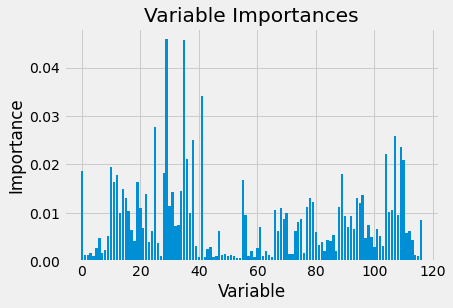

In [323]:
import matplotlib.pyplot as plt
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [329]:
from sklearn.metrics import mean_absolute_error 
prediction = rf.predict(x_test)
mae = mean_absolute_error(y_test, prediction)
print(mae)

20.759104166666667
